## eBay Car Sales

Author: Julian Moors\
Contact: julian.moors@outlook.com

### Introduction
_In this project we'll work with a dataset of used cars from eBay Kleinanzeigen, a classified section of the German eBay website._

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset and take an initial look at the headers
autos = pd.read_csv('data/ebay-car-sales.csv', encoding='latin1')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

### Data Dictionary

| Name                | Description                                       |
| ------------------- | ------------------------------------------------- |
| dateCrawled         | The date when the ad was first posted             |
| name                | The manufacturer of the car                       |
| seller              | The type of seller (private or not)               |
| offerType           | The type of ad                                    |
| price               | The amount in USD                                 |
| abtest              | Whether or not the ad was involved in an A/B test |
| vehicleType         | The type of vehicle                               |
| yearOfRegistration  | The year when the car was first available         |
| gearbox             | The type of gearbox (transmission)                |
| powerPS             | The amount of power of the vehicle in PS          |
| model               | The vehicle model                                 |
| odometer            | The distance the car has travelled (km)           |
| monthOfRegistration | The month when the car was first available        |
| fuelType            | The type of fuel                                  |
| brand               | The brand name of the car                         |
| notRepairedDamage   | Whether the card has any outstanding repairs      |
| dateCreated         | The date when the ad was created                  |
| nrOfPictures        | The number of pictures of the car in the ad       |
| postalCode          | The postcode the seller is located                |
| lastSeen            | The last time the crawler trawled the ad          |

### Data Cleaning
_Identify any outliers from low unique count of any column._

In [2]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


_Reformat headers in snake case and drop outliers._

In [3]:
autos.columns = ['crawled_date', 'name', 'seller', 'offer_type', 'price', 'ab_test', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'damage_repaired', 'created_date', 'pictures', 'postal_code', 'last_seen']
autos_new = autos[['crawled_date', 'name', 'price', 'vehicle_type', 'registration_year', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'created_date', 'postal_code', 'last_seen']]

In [4]:
# show current state of the dataset
autos_new

,crawled_date,name,price,vehicle_type,registration_year,power_ps,model,odometer_km,registration_month,fuel_type,brand,created_date,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",bus,2004,158,andere,"150,000km",3,lpg,peugeot,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",limousine,1997,286,7er,"150,000km",6,benzin,bmw,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",limousine,2009,102,golf,"70,000km",7,benzin,volkswagen,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",kleinwagen,2007,71,fortwo,"70,000km",6,benzin,smart,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",kombi,2003,0,focus,"150,000km",7,benzin,ford,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",limousine,2011,239,q5,"100,000km",1,diesel,audi,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",cabrio,1996,75,astra,"150,000km",5,benzin,opel,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",cabrio,2014,69,500,"5,000km",11,benzin,fiat,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",kombi,2013,150,a3,"40,000km",11,diesel,audi,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


_Remove the dollar sign ($) from **price** and distance measurement (km) from **odometer_km** and convert to numeric data type._

In [5]:
autos_new_copy = autos_new.copy()
autos_new_copy['price'] = autos_new_copy['price'].str.replace(r'^\$', '', regex=True)
autos_new_copy['price'] = autos_new_copy['price'].str.replace(',', '').astype(np.int64)
autos_new_copy['price'] = pd.to_numeric(autos_new_copy['price'], errors='coerce').fillna(0)
autos_new_copy = autos_new_copy.dropna(subset=['price'])
autos_new = autos_new_copy

In [6]:
autos_new_copy = autos_new.copy()
autos_new_copy['odometer_km'] = autos_new_copy['odometer_km'].str.replace('km', '')
autos_new_copy['odometer_km'] = autos_new_copy['odometer_km'].str.replace(',', '').astype(np.int64)
autos_new_copy['odometer_km'] = pd.to_numeric(autos_new_copy['odometer_km'], errors='coerce').fillna(0)
autos_new_copy = autos_new_copy.dropna(subset=['odometer_km'])
autos_new = autos_new_copy

_Reformat all date columns._

In [7]:
autos_new['crawled_date'] = autos_new['crawled_date'].str[:10]
autos_new['created_date'] = autos_new['created_date'].str[:10]
autos_new['last_seen'] = autos_new['last_seen'].str[:10]

In [8]:
# show current state of the dataset
autos_new

,crawled_date,name,price,vehicle_type,registration_year,power_ps,model,odometer_km,registration_month,fuel_type,brand,created_date,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,5000,bus,2004,158,andere,150000,3,lpg,peugeot,2016-03-26,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,limousine,1997,286,7er,150000,6,benzin,bmw,2016-04-04,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,8990,limousine,2009,102,golf,70000,7,benzin,volkswagen,2016-03-26,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,kleinwagen,2007,71,fortwo,70000,6,benzin,smart,2016-03-12,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,kombi,2003,0,focus,150000,7,benzin,ford,2016-04-01,39218,2016-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,limousine,2011,239,q5,100000,1,diesel,audi,2016-03-27,82131,2016-04-01
49996,2016-03-28,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,cabrio,1996,75,astra,150000,5,benzin,opel,2016-03-28,44807,2016-04-02
49997,2016-04-02,Fiat_500_C_1.2_Dualogic_Lounge,13200,cabrio,2014,69,500,5000,11,benzin,fiat,2016-04-02,73430,2016-04-04
49998,2016-03-08,Audi_A3_2.0_TDI_Sportback_Ambition,22900,kombi,2013,150,a3,40000,11,diesel,audi,2016-03-08,35683,2016-04-05


_Remove all rows that fall out of reasonable boundaries for the **registration_year** and **price** data points._

In [9]:
boolean_filter = (autos_new['registration_year'] > 1900) & (autos_new['registration_year'] < 2016)
registration_year = autos_new['registration_year']
autos_new['registration_year'] = registration_year[boolean_filter]

In [10]:
brand = autos_new['brand']
brand_counts = brand.value_counts()
manufacturers = brand_counts.index

manufacturers = autos_new['brand'].value_counts().index
boolean_filter = autos_new['brand'].isin(manufacturers)
autos_new = autos_new[(autos_new['price'] >= 350) & (autos_new['price'] < 3890000)]

boolean_filter = autos_new['brand'].isin(manufacturers)
filtered_prices = autos_new[boolean_filter].sort_values(by='price', ascending=False)

In [11]:
# re-check structure of the dataset
autos_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46418 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crawled_date        46418 non-null  object 
 1   name                46418 non-null  object 
 2   price               46418 non-null  int64  
 3   vehicle_type        42463 non-null  object 
 4   registration_year   43526 non-null  float64
 5   power_ps            46418 non-null  int64  
 6   model               44220 non-null  object 
 7   odometer_km         46418 non-null  int64  
 8   registration_month  46418 non-null  int64  
 9   fuel_type           42961 non-null  object 
 10  brand               46418 non-null  object 
 11  created_date        46418 non-null  object 
 12  postal_code         46418 non-null  int64  
 13  last_seen           46418 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.3+ MB


### Data Visualisation
_Filter dataset to keep **price** in a realistic range and arrange cars based on average price and chart the results showing ascending first._

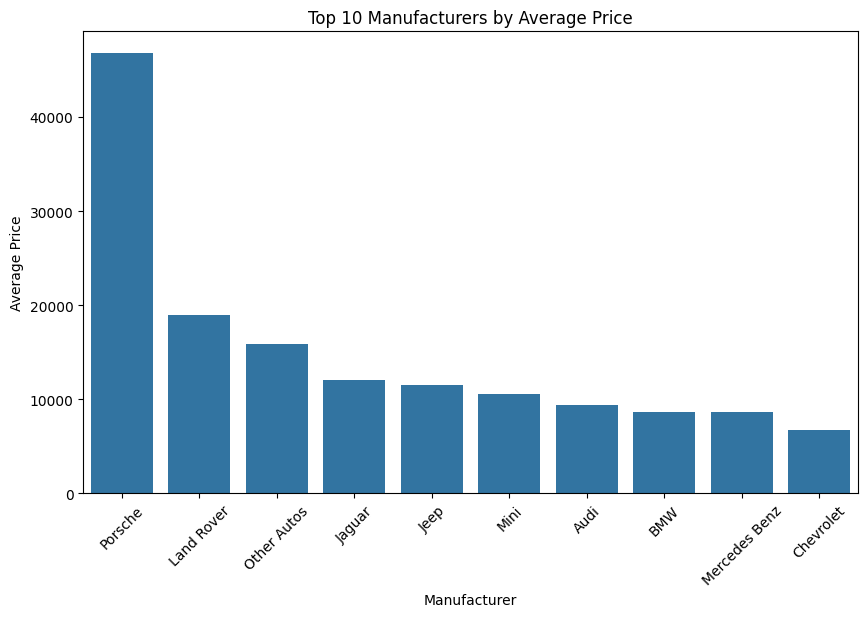

In [12]:
filtered_data = autos_new[(autos_new['price'] >= 350) & (autos_new['price'] < 3890000)]
avg_price_per_manufacturer = filtered_data.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

# translate all German labels (if needed) and reformat columns to be shown on bar chart
formatted_labels = [label.replace('_', ' ').title() if label != 'sonstige_autos' else 'Other Autos' for label in avg_price_per_manufacturer.index]
formatted_labels = ['BMW' if label == 'Bmw' else label for label in formatted_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=formatted_labels, y=avg_price_per_manufacturer.values)
plt.xticks(rotation=45)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Top 10 Manufacturers by Average Price')
plt.show()

### Conclusion
_The charted results reflect a common understanding of the car market in that the average price of a car will be higher with high performance engines. In order to gain a better understanding of customer trends a datapoint could be added that keeps track of how many times a particular car model has been sold._